In [1]:
import pandas as pd
import spacy
import numpy as np
from spacy import attrs
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Pra não truncar as strings
pd.set_option('display.max_colwidth', -1)

In [3]:
ufpe = pd.read_csv('ufpe.csv')
carnegie = pd.read_csv('carnegie.csv')

In [4]:
ufpe = ufpe[ufpe['abstract'] != "Not found"]
ufpe = ufpe.reset_index(drop=True)

In [5]:
carnegie_sample = carnegie.sample(151)
carnegie_sample = carnegie_sample.reset_index(drop=True)

In [6]:
print(len(carnegie_sample))

151


In [7]:
nlp = spacy.load('en')

In [8]:
def get_lemma(doc):
    tokens = []
    for token in doc:
        if not token.is_punct and (not token.is_digit) and (not token.is_stop):
            if(len(token.lemma_) > 2):
                tokens.append(token.lemma_)
            
    return tokens

In [9]:
def get_counter_words_from_titles(dataframe):
    words = Counter()
    for i,row in dataframe.iterrows():
        doc = nlp(row['title'].lower())
        lemmas = get_lemma(doc)
        for token in lemmas:
            words[token]+=1
            
    return words
    

# UFPE

In [10]:
words_ufpe = get_counter_words_from_titles(ufpe)

In [11]:
words_ufpe.most_common()

[('study', 24),
 ('tool', 24),
 ('analysi', 23),
 ('development', 18),
 ('base', 15),
 ('software', 12),
 ('system', 12),
 ('application', 12),
 ('datum', 11),
 ('network', 10),
 ('model', 10),
 ('proces', 9),
 ('project', 9),
 ('environment', 8),
 ('digital', 8),
 ('busines', 8),
 ('support', 7),
 ('case', 7),
 ('information', 7),
 ('use', 6),
 ('web', 6),
 ('source', 6),
 ('management', 6),
 ('recognition', 5),
 ('architecture', 5),
 ('interactive', 5),
 ('implementation', 5),
 ('generation', 5),
 ('comparative', 5),
 ('site', 4),
 ('problem', 4),
 ('object', 4),
 ('service', 4),
 ('specification', 4),
 ('technology', 4),
 ('automatic', 4),
 ('open', 4),
 ('social', 4),
 ('technique', 4),
 ('learn', 4),
 ('self', 4),
 ('platform', 4),
 ('aspect', 4),
 ('component', 4),
 ('language', 4),
 ('artificial', 3),
 ('distance', 3),
 ('detection', 3),
 ('metaphor', 3),
 ('integration', 3),
 ('optimization', 3),
 ('sharing', 3),
 ('product', 3),
 ('design', 3),
 ('resource', 3),
 ('evolution',

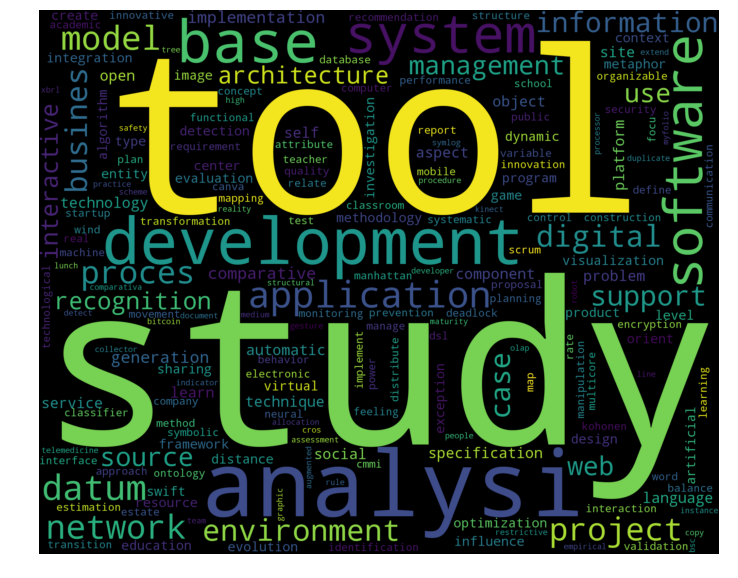

In [12]:
wordcloud = WordCloud(width=2000,height=1600).generate_from_frequencies(words_ufpe)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Carnegie Mellon

In [13]:
words_carnegie = get_counter_words_from_titles(carnegie_sample)

In [14]:
words_carnegie.most_common()

[('system', 12),
 ('learn', 11),
 ('base', 10),
 ('robot', 9),
 ('language', 8),
 ('recognition', 8),
 ('algorithm', 8),
 ('model', 8),
 ('datum', 7),
 ('mobile', 7),
 ('detection', 6),
 ('object', 6),
 ('network', 6),
 ('inference', 6),
 ('time', 6),
 ('technique', 6),
 ('word', 6),
 ('machine', 5),
 ('classification', 5),
 ('human', 5),
 ('logic', 5),
 ('distribute', 5),
 ('improve', 5),
 ('proof', 5),
 ('programming', 5),
 ('application', 5),
 ('task', 4),
 ('problem', 4),
 ('behavior', 4),
 ('aware', 4),
 ('type', 4),
 ('code', 4),
 ('real', 4),
 ('dynamic', 4),
 ('information', 4),
 ('generation', 3),
 ('random', 3),
 ('agent', 3),
 ('feature', 3),
 ('predict', 3),
 ('computing', 3),
 ('adaptive', 3),
 ('design', 3),
 ('speech', 3),
 ('educational', 3),
 ('multicast', 3),
 ('computer', 3),
 ('verification', 3),
 ('visual', 3),
 ('approach', 3),
 ('brain', 3),
 ('scale', 3),
 ('supervise', 3),
 ('structure', 3),
 ('control', 3),
 ('efficient', 3),
 ('wireless', 3),
 ('navigation', 

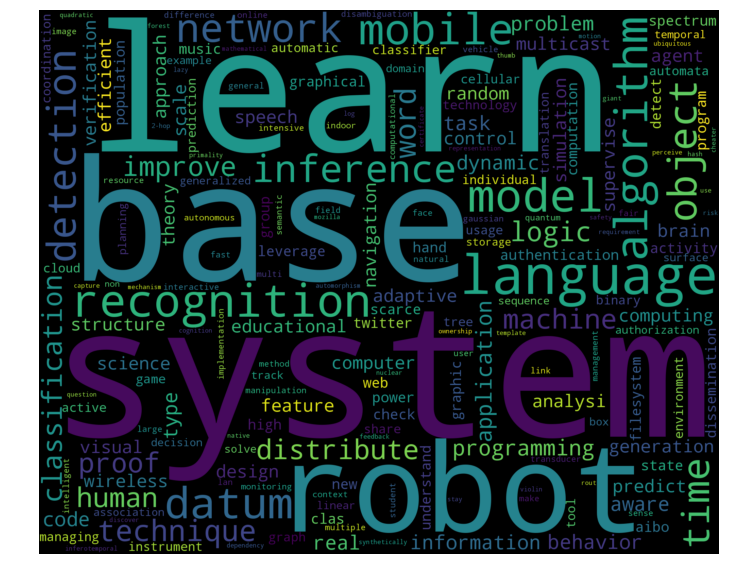

In [15]:
wordcloud = WordCloud(width=2000,height=1600).generate_from_frequencies(words_carnegie)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()